In [233]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import matplotlib.patches as mpatches
from scipy.stats import norm, uniform
from sklearn.metrics import mutual_info_score

In [234]:
%load_ext autoreload
%autoreload 2
from functions import circle, parabola, line

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [235]:
def mutual(x,y, bins):
    c_xy = np.histogram2d(x,y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi   

In [236]:
samples = 500
bins = 10

In [237]:
xc, yc = circle(samples, 1, s=0.09)
rc = np.round(np.corrcoef(xc,yc)[0,1],4)
mic = np.round(mutual(xc,yc, bins),4)

In [238]:
xp, yp = parabola(1000, 1.5, s=0.1)
rp = np.round(np.corrcoef(xp,yp)[0,1],4)
mip = np.round(mutual(xp,yp, bins),4)

In [239]:
xl, yl = line(samples, b=0, s=0.2)
rl = np.round(np.corrcoef(xl,yl)[0,1],4)
mil = np.round(mutual(xl,yl, bins),4)

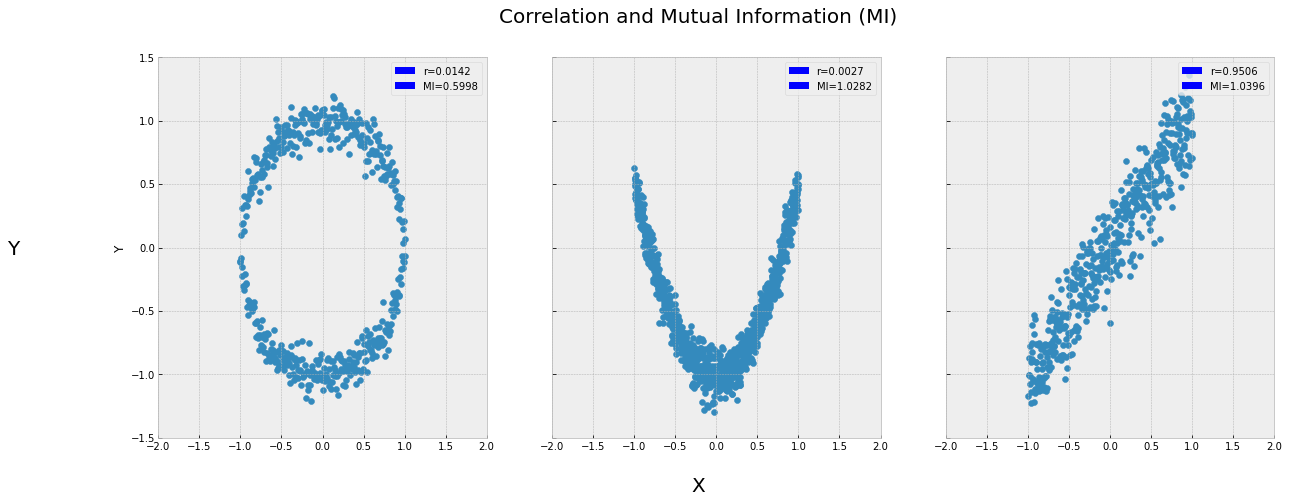

In [240]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7), sharex=True, sharey=True)

plt.suptitle('Correlation and Mutual Information (MI)', fontsize=20)
ax1.scatter(xc,yc)
rpt = mpatches.Patch(label=f'r={rc}')
mpt = mpatches.Patch(label=f'MI={mic}')
ax1.legend(handles=[rpt, mpt] , loc='upper right')
ax1.set_xlim(-2,2)
ax1.set_ylim(-1.5,1.5)
#ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.scatter(xp,yp)
rpt = mpatches.Patch(label=f'r={rp}')
mpt = mpatches.Patch(label=f'MI={mip}')
ax2.legend(handles=[rpt, mpt] , loc='upper right')
ax2.set_xlim(-2,2)
ax2.set_ylim(-1.5,1.5)

ax3.scatter(xl,yl)
rpt = mpatches.Patch(label=f'r={rl}')
mpt = mpatches.Patch(label=f'MI={mil}')
ax3.legend(handles=[rpt, mpt] , loc='upper right')
ax3.set_ylim(-1.5,1.5)

fig.supxlabel('X', fontsize=20)
fig.supylabel('Y', fontsize=20, rotation=360)

plt.show()